In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv('Ground_Averages.csv')
df.head()

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16


# Perform Analysis

In [3]:
df.describe()

,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,7.792453,7.367925,0.094340,0.311321,3582.500000,112.103774,4031.896226,34.216604,5.458113
std,8.285061,8.022974,0.324501,0.622793,3575.148949,122.883602,4296.526140,11.367913,0.756841
min,1.000000,1.000000,0.000000,0.000000,209.000000,6.000000,252.000000,15.540000,3.880000
25%,2.250000,2.000000,0.000000,0.000000,1239.250000,34.000000,1229.000000,28.800000,4.990000
50%,5.000000,5.000000,0.000000,0.000000,2283.500000,75.000000,2777.500000,32.775000,5.440000
75%,10.000000,10.000000,0.000000,0.000000,4759.500000,137.250000,5279.500000,36.282500,5.757500
max,50.000000,50.000000,2.000000,3.000000,20917.000000,739.000000,26328.000000,120.160000,9.690000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ground  106 non-null    object 
 1   Span    106 non-null    object 
 2   Mat     106 non-null    int64  
 3   Won     106 non-null    int64  
 4   Tied    106 non-null    int64  
 5   NR      106 non-null    int64  
 6   Runs    106 non-null    int64  
 7   Wkts    106 non-null    int64  
 8   Balls   106 non-null    int64  
 9   Ave     106 non-null    float64
 10  RPO     106 non-null    float64
dtypes: float64(2), int64(7), object(2)
memory usage: 9.2+ KB


In [5]:
df.dtypes

Ground     object
Span       object
Mat         int64
Won         int64
Tied        int64
NR          int64
Runs        int64
Wkts        int64
Balls       int64
Ave       float64
RPO       float64
dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df["Ground"]=label.fit_transform(df["Ground"])
df["Span"]=label.fit_transform(df["Span"])

# data visualization

<AxesSubplot:xlabel='Ground', ylabel='Balls'>

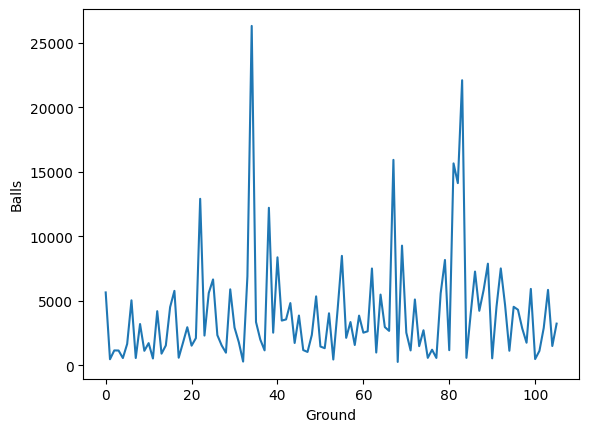

In [8]:
sns.lineplot(x="Ground",y="Balls",data=df)

<AxesSubplot:xlabel='Won', ylabel='Balls'>

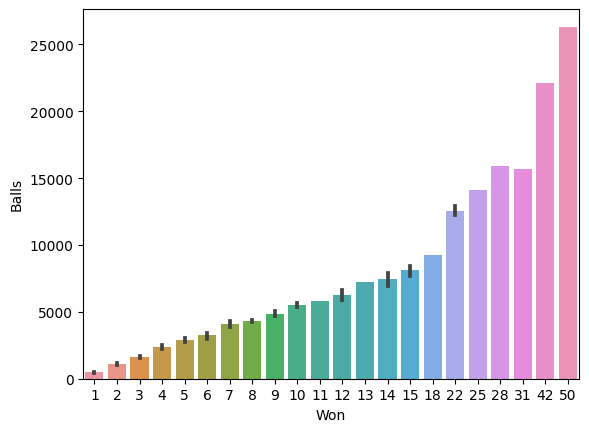

In [10]:
sns.barplot(x="Won",y="Balls",data=df)

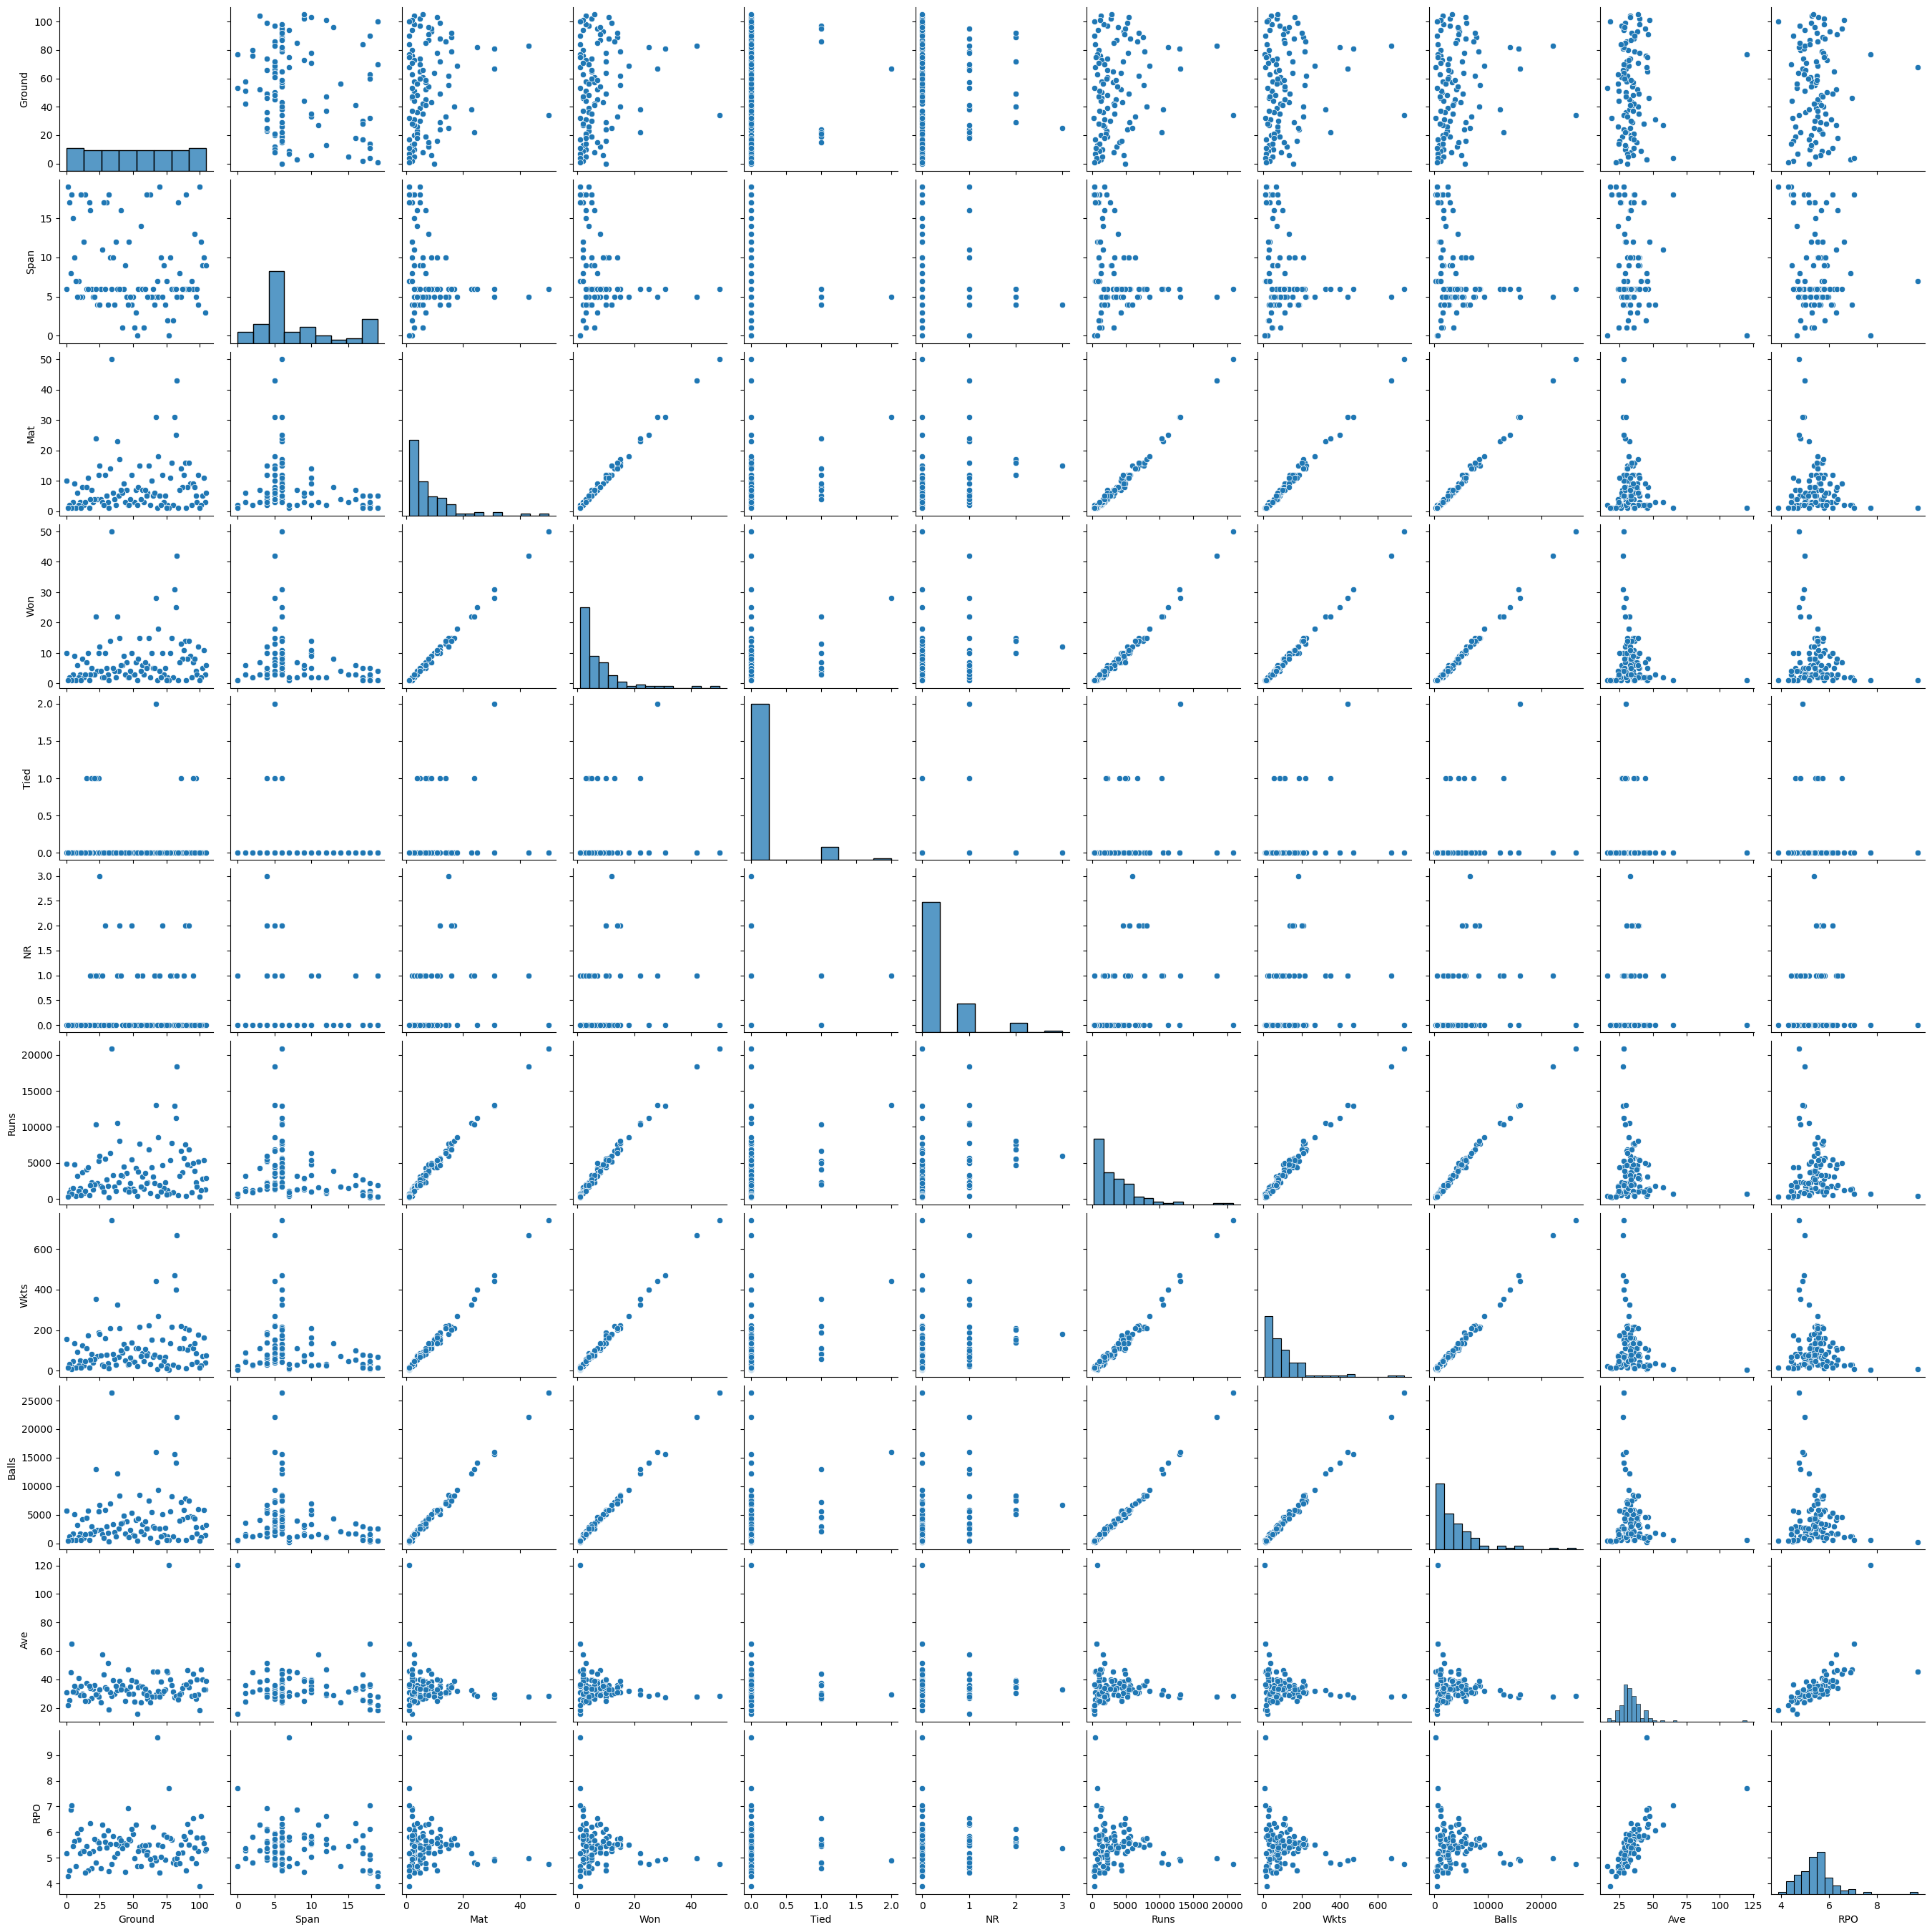

In [11]:
sns.pairplot(df)


<AxesSubplot:>

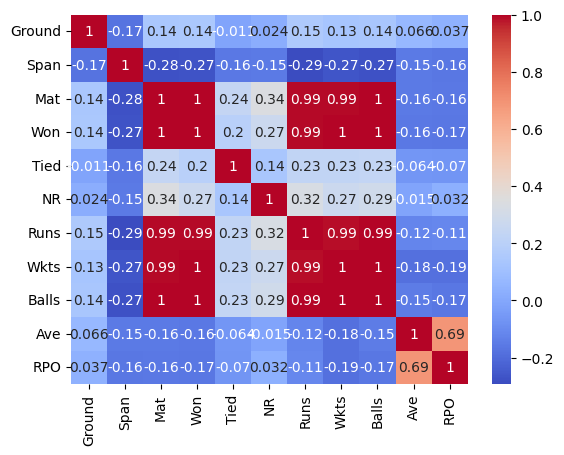

In [12]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# split data into X and Y

In [15]:
x=df.drop(labels='Won',axis=1)
y=df["Won"]
y

0       4
1       4
2      15
3       2
4      10
       ..
101     1
102     1
103     4
104     1
105     1
Name: Won, Length: 106, dtype: int64

# split data into train and test

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred=tree.predict(x_test)
y_pred

array([ 1,  3,  6, 12, 10,  4,  1,  4,  8,  2, 10,  3, 15,  4,  2,  1,  2,
        3,  2,  3,  1,  3], dtype=int64)

# Find the accuracy of model

In [24]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.6363636363636364